# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import wikipedia
import string

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize


nltk.download("stopwords")
nltk.download("vader_lexicon")
nltk.download("punkt")


plt.style.use("dark_background")

pd.set_option("display.max_columns", 500)
plt.style.use("dark_background")

%load_ext lab_black

[nltk_data] Downloading package stopwords to /home/luke/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/luke/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/luke/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Sentiment analysis of all presidential candidate wikipedia pages (Words)

Scrape Wiki page, clean, and do sentiment analysis using NLTK library

In [13]:
def sentiment_of_wiki_page_words(title):
    # grab text from wiki page
    wiki = wikipedia.page(title, auto_suggest=False)
    text = wiki.content

    # split into words
    word_tokens = word_tokenize(text)

    # Remove stop words and punctuation

    stops = stopwords.words("english")
    for n in string.punctuation:
        stops.append(n)

    additional_stops = [
        "==",
        "''",
        "'s",
        "``",
        "``",
        "———",
        "ISBN",
        "===",
        "Party",
        "party",
        "United",
        "united",
    ]
    for stop in additional_stops:
        stops.append(stop)

    filtered_text = [w for w in word_tokens if not w.lower() in stops]

    # Dataframe to store results
    sendf = pd.DataFrame(filtered_text, columns=["text"])

    # Sentiment analysis object
    sid = SentimentIntensityAnalyzer()

    # Apply sentiment analysis to each word
    sendf[["neg", "neu", "pos", "compund"]] = (
        sendf["text"].apply(sid.polarity_scores).apply(pd.Series)
    )
    # Remove neutral words
    sendf = sendf[sendf.compund != 0.0].drop_duplicates()

    # Calculate sum, mean, and median scores
    sum_score = sendf["compund"].sum()
    mean_score = sendf["compund"].mean()
    median_score = sendf["compund"].median()

    # return f"sum score = {round(sum_score, 3)}, mean score = {round(mean_score,3)}, median score = {round(median_score,3)}"
    return sum_score, mean_score, median_score
    # return sendf

In [18]:
list_of_candidates = [
    "Joe Biden",
    "Robert F. Kennedy Jr.",
    "Marianne Williamson",
    "Doug Burgum",
    "Chris Christie",
    "Ron DeSantis",
    "Larry Elder",
    "Nikki Haley",
    "Asa Hutchinson",
    "Mike Pence",
    "Vivek Ramaswamy",
    "Tim Scott",
    "Corey Stapleton",
    "Francis X. Suarez",
    "Donald Trump",
]

In [32]:
df_pagesen = pd.DataFrame(
    columns=["Candidate", "sum_score", "mean_score", "median_score"]
)
for candidate in list_of_candidates:
    raw_results = sentiment_of_wiki_page_words(candidate)

    sum_score = raw_results[0]
    mean_score = raw_results[1]
    median_score = raw_results[2]

    new_row = {
        "Candidate": candidate,
        "sum_score": sum_score,
        "mean_score": mean_score,
        "median_score": median_score,
    }
    new_row = pd.DataFrame.from_dict(new_row, orient="index").T

    df_pagesen = pd.concat([df_pagesen, new_row])

df_pagesen["party"] = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

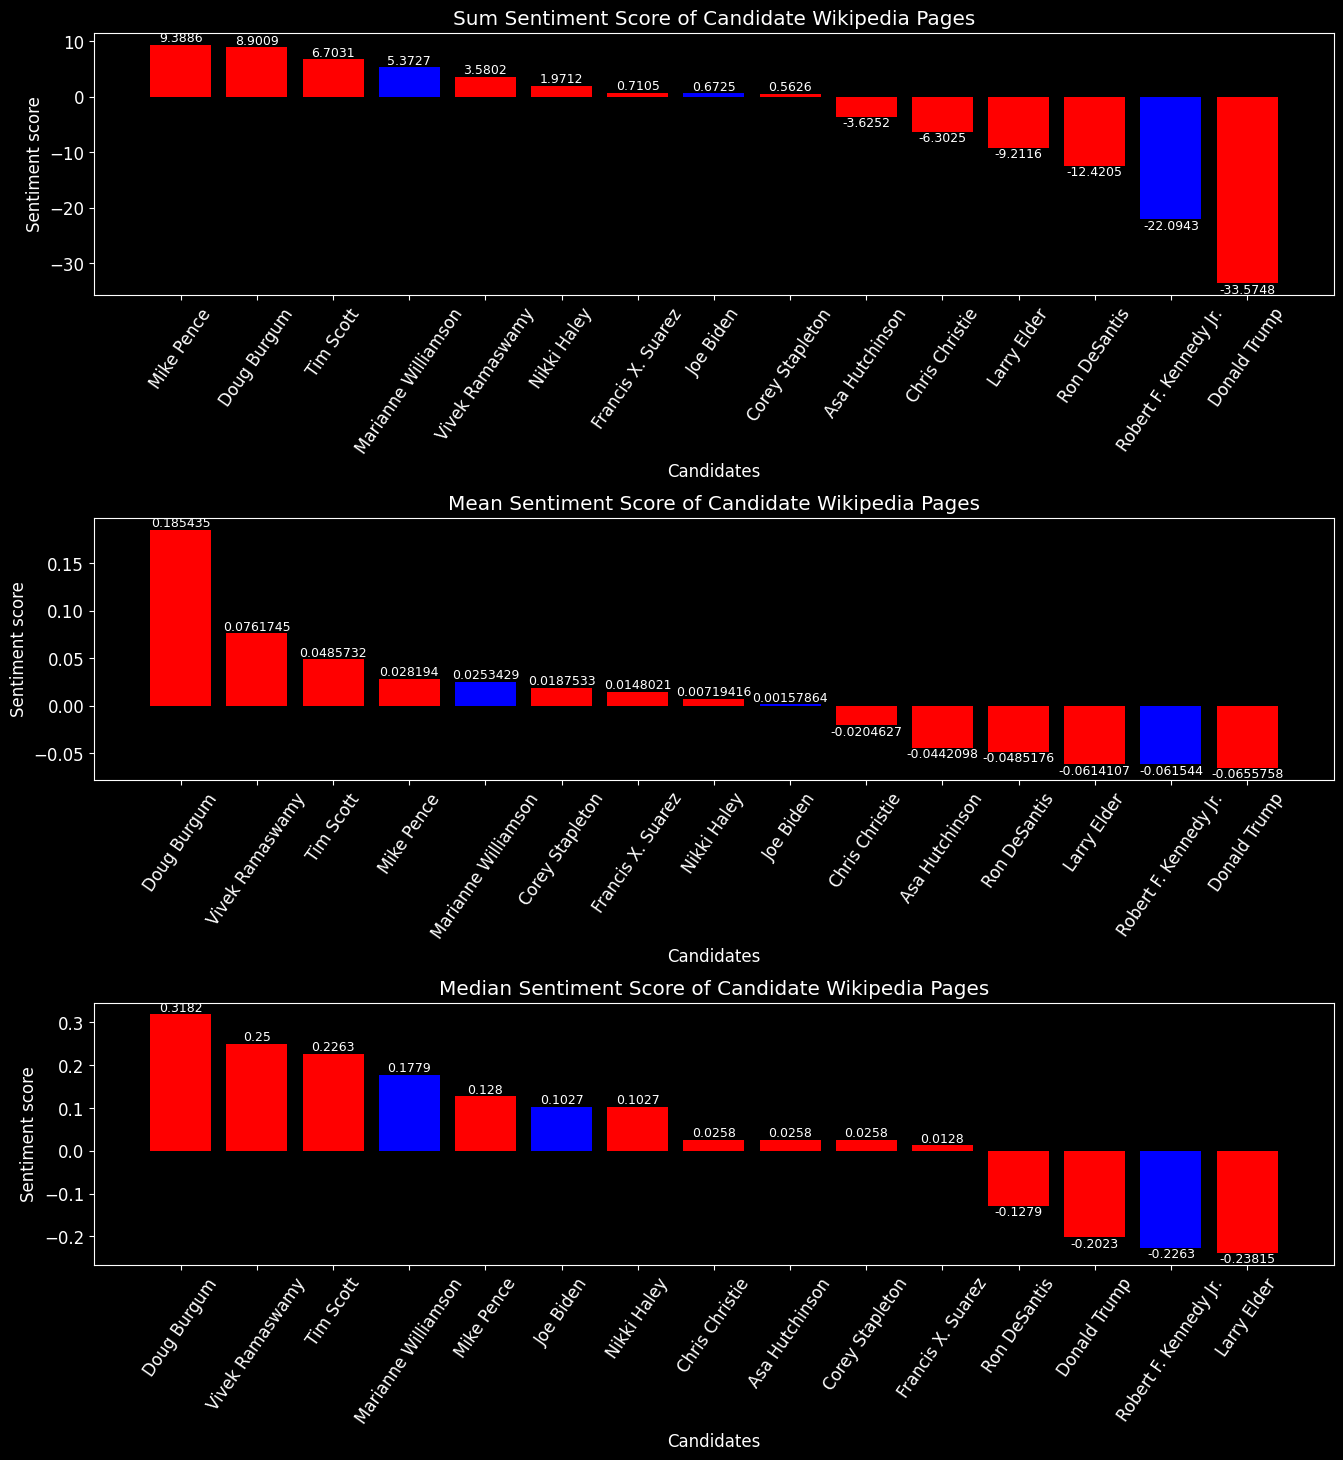

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 16))
plt.rc("font", size=12)  # controls default text sizes
plt.rc("axes", labelsize=16)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)

# Sum score
sum_colors = [
    "red" if i != 1 else "blue"
    for i in df_pagesen.sort_values(by="sum_score", ascending=False)["party"]
]

p1 = ax1.bar(
    x=df_pagesen.sort_values(by="sum_score", ascending=False)["Candidate"],
    height=df_pagesen.sort_values(by="sum_score", ascending=False)["sum_score"],
    data=df_pagesen,
    color=sum_colors,
)

ax1.set_ylabel("Sentiment score")
ax1.set_xlabel("Candidates")
ax1.set_title("Sum Sentiment Score of Candidate Wikipedia Pages")
ax1.bar_label(p1, label_type="edge", fontsize=9)

ax1.tick_params(axis="x", labelrotation=55)  # Rotate xticks in the first subplot

# Mean score
mean_colors = [
    "red" if i != 1 else "blue"
    for i in df_pagesen.sort_values(by="mean_score", ascending=False)["party"]
]

p2 = ax2.bar(
    x=df_pagesen.sort_values(by="mean_score", ascending=False)["Candidate"],
    height=df_pagesen.sort_values(by="mean_score", ascending=False)["mean_score"],
    data=df_pagesen,
    color=mean_colors,
)

ax2.set_ylabel("Sentiment score")
ax2.set_xlabel("Candidates")
ax2.set_title("Mean Sentiment Score of Candidate Wikipedia Pages")
ax2.bar_label(p2, label_type="edge", fontsize=9)

ax2.tick_params(axis="x", labelrotation=55)  # Rotate xticks in the second subplot

# Median score
median_colors = [
    "red" if i != 1 else "blue"
    for i in df_pagesen.sort_values(by="median_score", ascending=False)["party"]
]

p3 = ax3.bar(
    x=df_pagesen.sort_values(by="median_score", ascending=False)["Candidate"],
    height=df_pagesen.sort_values(by="median_score", ascending=False)["median_score"],
    data=df_pagesen,
    color=median_colors,
)

ax3.set_ylabel("Sentiment score")
ax3.set_xlabel("Candidates")
ax3.set_title("Median Sentiment Score of Candidate Wikipedia Pages")
ax3.bar_label(p3, label_type="edge", fontsize=9)

ax3.tick_params(axis="x", labelrotation=55)  # Rotate xticks in the third subplot

plt.subplots_adjust(hspace=0.85)  # Adjust the vertical spacing between subplots

plt.show()

# Sentiment analysis of all presidential candidate wikipedia pages (Sentences)

In [16]:
def sentiment_of_wiki_page_sentences(title):
    # grab text from wiki page
    wiki = wikipedia.page(title, auto_suggest=False)
    text = wiki.content

    # split into sentences
    word_tokens = sent_tokenize(text)

    # Remove stop words and punctuation

    stops = stopwords.words("english")
    for n in string.punctuation:
        stops.append(n)

    additional_stops = [
        "==",
        "''",
        "'s",
        "``",
        "``",
        "———",
        "ISBN",
        "===",
        "Party",
        "party",
        "United",
        "united",
    ]
    for stop in additional_stops:
        stops.append(stop)

    filtered_text = [w for w in word_tokens if not w.lower() in stops]

    # Dataframe to store results
    sendf = pd.DataFrame(filtered_text, columns=["text"])

    # Sentiment analysis object
    sid = SentimentIntensityAnalyzer()

    # Apply sentiment analysis to each word
    sendf[["neg", "neu", "pos", "compund"]] = (
        sendf["text"].apply(sid.polarity_scores).apply(pd.Series)
    )
    # Remove neutral words
    sendf = sendf[sendf.compund != 0.0].drop_duplicates()

    # Calculate sum, mean, and median scores
    sum_score = sendf["compund"].sum()
    mean_score = sendf["compund"].mean()
    median_score = sendf["compund"].median()

    # return f"sum score = {round(sum_score, 3)}, mean score = {round(mean_score,3)}, median score = {round(median_score,3)}"
    return sum_score, mean_score, median_score
    # return sendf

In [19]:
df_pagesen = pd.DataFrame(
    columns=["Candidate", "sum_score", "mean_score", "median_score"]
)
for candidate in list_of_candidates:
    raw_results = sentiment_of_wiki_page_sentences(candidate)

    sum_score = raw_results[0]
    mean_score = raw_results[1]
    median_score = raw_results[2]

    new_row = {
        "Candidate": candidate,
        "sum_score": sum_score,
        "mean_score": mean_score,
        "median_score": median_score,
    }
    new_row = pd.DataFrame.from_dict(new_row, orient="index").T

    df_pagesen = pd.concat([df_pagesen, new_row])

df_pagesen["party"] = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

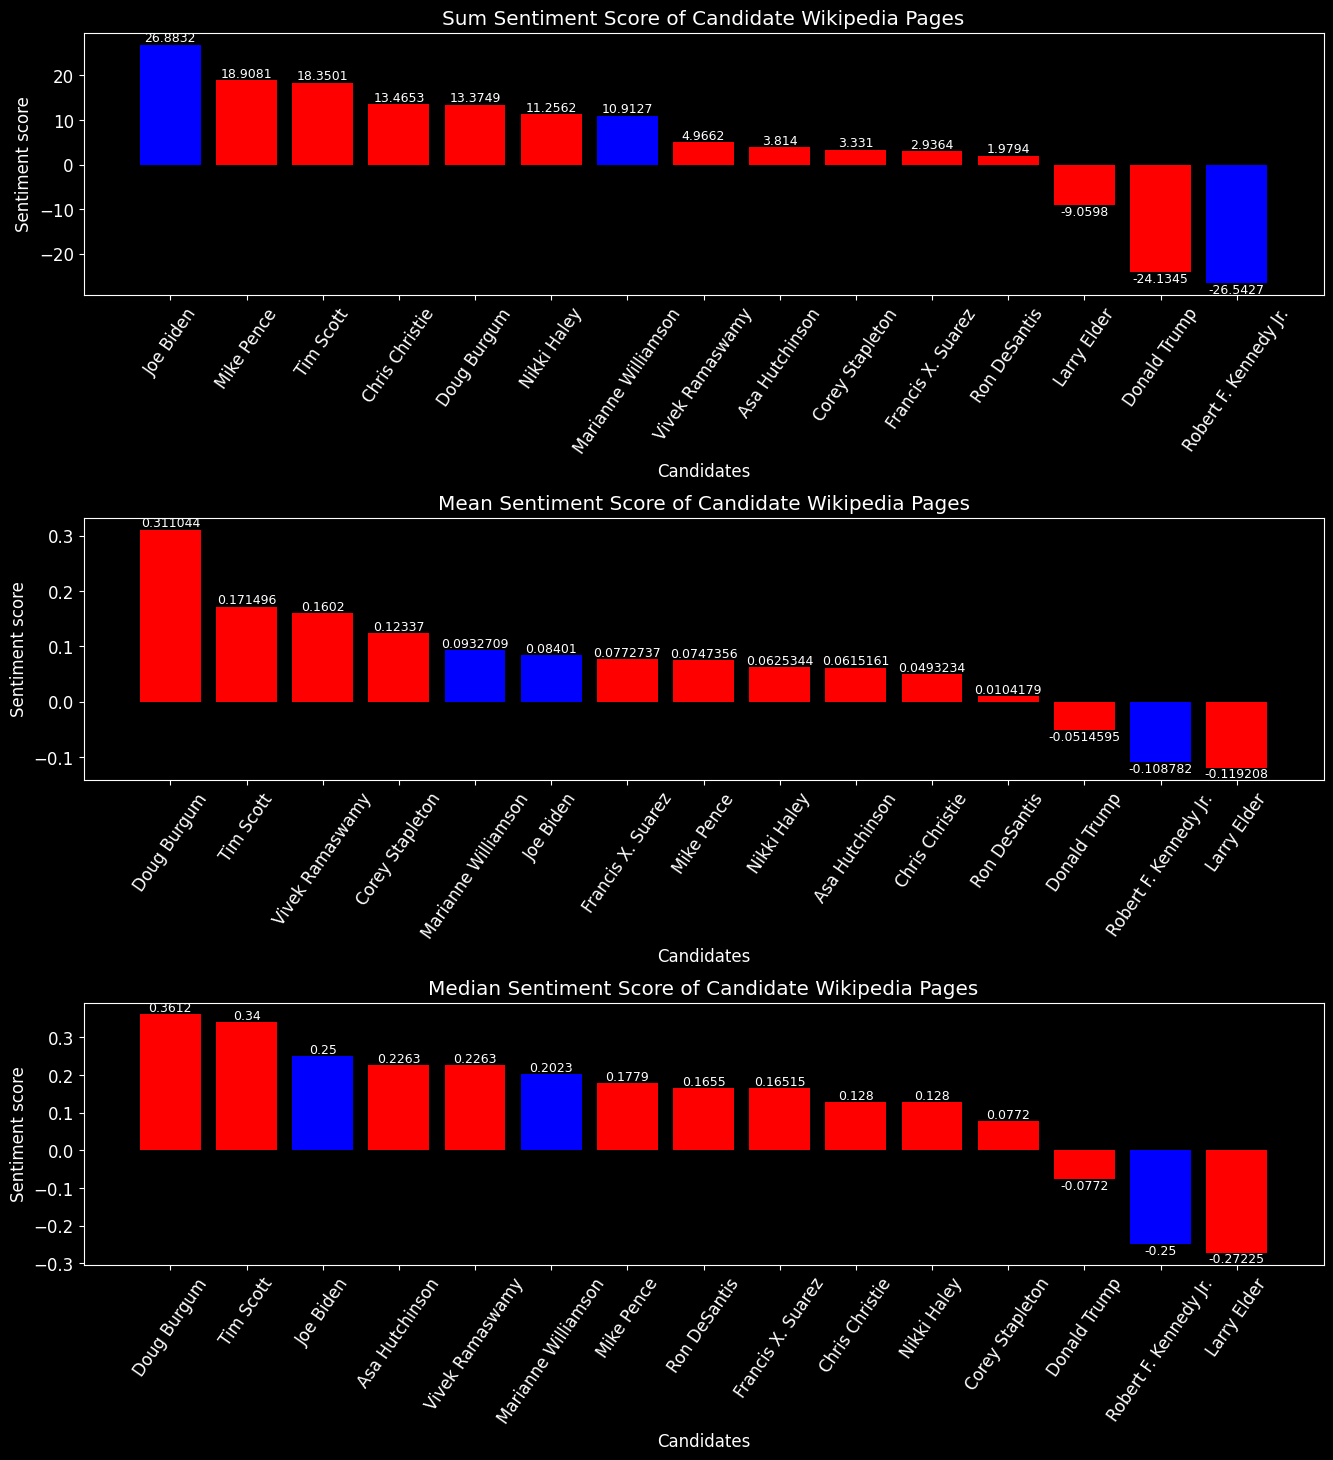

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 16))
plt.rc("font", size=12)  # controls default text sizes
plt.rc("axes", labelsize=16)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)

# Sum score
sum_colors = [
    "red" if i != 1 else "blue"
    for i in df_pagesen.sort_values(by="sum_score", ascending=False)["party"]
]

p1 = ax1.bar(
    x=df_pagesen.sort_values(by="sum_score", ascending=False)["Candidate"],
    height=df_pagesen.sort_values(by="sum_score", ascending=False)["sum_score"],
    data=df_pagesen,
    color=sum_colors,
)

ax1.set_ylabel("Sentiment score")
ax1.set_xlabel("Candidates")
ax1.set_title("Sum Sentiment Score of Candidate Wikipedia Pages")
ax1.bar_label(p1, label_type="edge", fontsize=9)

ax1.tick_params(axis="x", labelrotation=55)  # Rotate xticks in the first subplot

# Mean score
mean_colors = [
    "red" if i != 1 else "blue"
    for i in df_pagesen.sort_values(by="mean_score", ascending=False)["party"]
]

p2 = ax2.bar(
    x=df_pagesen.sort_values(by="mean_score", ascending=False)["Candidate"],
    height=df_pagesen.sort_values(by="mean_score", ascending=False)["mean_score"],
    data=df_pagesen,
    color=mean_colors,
)

ax2.set_ylabel("Sentiment score")
ax2.set_xlabel("Candidates")
ax2.set_title("Mean Sentiment Score of Candidate Wikipedia Pages")
ax2.bar_label(p2, label_type="edge", fontsize=9)

ax2.tick_params(axis="x", labelrotation=55)  # Rotate xticks in the second subplot

# Median score
median_colors = [
    "red" if i != 1 else "blue"
    for i in df_pagesen.sort_values(by="median_score", ascending=False)["party"]
]

p3 = ax3.bar(
    x=df_pagesen.sort_values(by="median_score", ascending=False)["Candidate"],
    height=df_pagesen.sort_values(by="median_score", ascending=False)["median_score"],
    data=df_pagesen,
    color=median_colors,
)

ax3.set_ylabel("Sentiment score")
ax3.set_xlabel("Candidates")
ax3.set_title("Median Sentiment Score of Candidate Wikipedia Pages")
ax3.bar_label(p3, label_type="edge", fontsize=9)

ax3.tick_params(axis="x", labelrotation=55)  # Rotate xticks in the third subplot

plt.subplots_adjust(hspace=0.85)  # Adjust the vertical spacing between subplots

plt.show()